Nilai Kepuasan: 8.063063063063064


c:\Users\user\miniconda3\envs\py39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


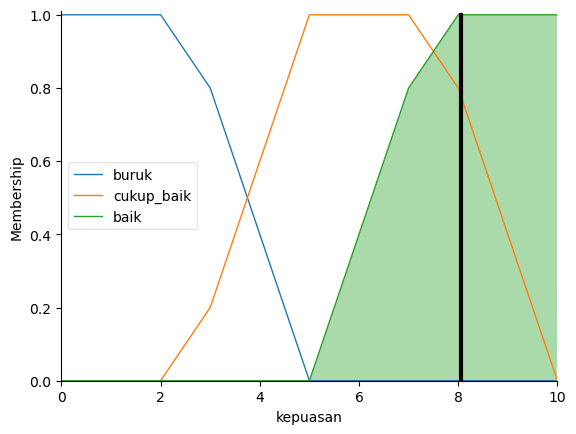

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Mendefinisikan variabel input
kualitas_pengajaran = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas_pengajaran')
fasilitas = ctrl.Antecedent(np.arange(0, 11, 1), 'fasilitas')
layanan_akademik = ctrl.Antecedent(np.arange(0, 11, 1), 'layanan_akademik')

# Mendefinisikan variabel output
kepuasan = ctrl.Consequent(np.arange(0, 11, 1), 'kepuasan')

# Mendefinisikan fungsi keanggotaan untuk kualitas_pengajaran
kualitas_pengajaran['buruk'] = fuzz.trapmf(kualitas_pengajaran.universe, [0, 0, 2.5, 5])
kualitas_pengajaran['cukup_baik'] = fuzz.trapmf(kualitas_pengajaran.universe, [2.5, 5, 7.5, 10])
kualitas_pengajaran['baik'] = fuzz.trapmf(kualitas_pengajaran.universe, [5, 7.5, 10, 10])

# Mendefinisikan fungsi keanggotaan untuk fasilitas
fasilitas['buruk'] = fuzz.trapmf(fasilitas.universe, [0, 0, 2.5, 5])
fasilitas['cukup_baik'] = fuzz.trapmf(fasilitas.universe, [2.5, 5, 7.5, 10])
fasilitas['baik'] = fuzz.trapmf(fasilitas.universe, [5, 7.5, 10, 10])

# Mendefinisikan fungsi keanggotaan untuk layanan_akademik
layanan_akademik['buruk'] = fuzz.trapmf(layanan_akademik.universe, [0, 0, 2.5, 5])
layanan_akademik['cukup_baik'] = fuzz.trapmf(layanan_akademik.universe, [2.5, 5, 7.5, 10])
layanan_akademik['baik'] = fuzz.trapmf(layanan_akademik.universe, [5, 7.5, 10, 10])

# Mendefinisikan fungsi keanggotaan untuk kepuasan
kepuasan['buruk'] = fuzz.trapmf(kepuasan.universe, [0, 0, 2.5, 5])
kepuasan['cukup_baik'] = fuzz.trapmf(kepuasan.universe, [2.5, 5, 7.5, 10])
kepuasan['baik'] = fuzz.trapmf(kepuasan.universe, [5, 7.5, 10, 10])

# Menentukan aturan fuzzy
rule1 = ctrl.Rule(kualitas_pengajaran['buruk'] | fasilitas['buruk'] | layanan_akademik['buruk'], kepuasan['buruk'])
rule2 = ctrl.Rule(kualitas_pengajaran['cukup_baik'] & fasilitas['cukup_baik'] & layanan_akademik['cukup_baik'], kepuasan['cukup_baik'])
rule3 = ctrl.Rule(kualitas_pengajaran['baik'] & fasilitas['baik'] & layanan_akademik['baik'], kepuasan['baik'])

# Membuat sistem kontrol
kepuasan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
kepuasan_simulasi = ctrl.ControlSystemSimulation(kepuasan_ctrl)

# Memberikan input pada sistem
kepuasan_simulasi.input['kualitas_pengajaran'] = 10
kepuasan_simulasi.input['fasilitas'] = 10
kepuasan_simulasi.input['layanan_akademik'] = 10

# Melakukan komputasi
kepuasan_simulasi.compute()

# Menampilkan hasil
print(f"Nilai Kepuasan: {kepuasan_simulasi.output['kepuasan']}")

# Visualisasi hasil
kepuasan.view(sim=kepuasan_simulasi)
plt.show()